In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
from google.colab import files
uploaded = files.upload()

# Load dataset
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Drop ID columns
df.drop(columns=["Unnamed: 0", "flight"], inplace=True)


Saving flight price prediction.csv to flight price prediction.csv


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB
None


In [4]:
print(df.describe())

            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000


In [5]:
print(df.isnull().sum())

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


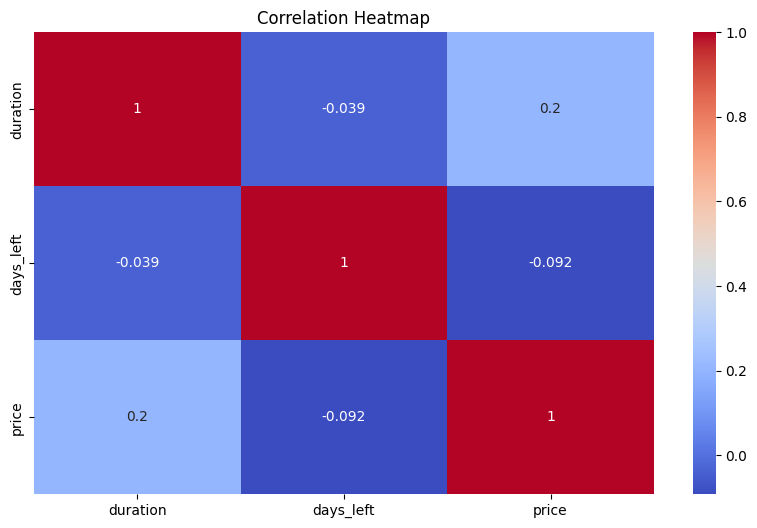

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

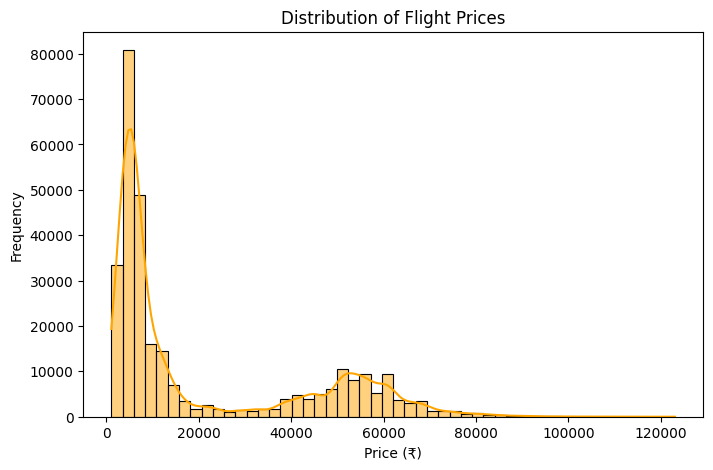

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True, color='orange')
plt.title("Distribution of Flight Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()


In [8]:
print(df.columns.tolist())


['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


/tmp/ipython-input-9-2987113317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set3')


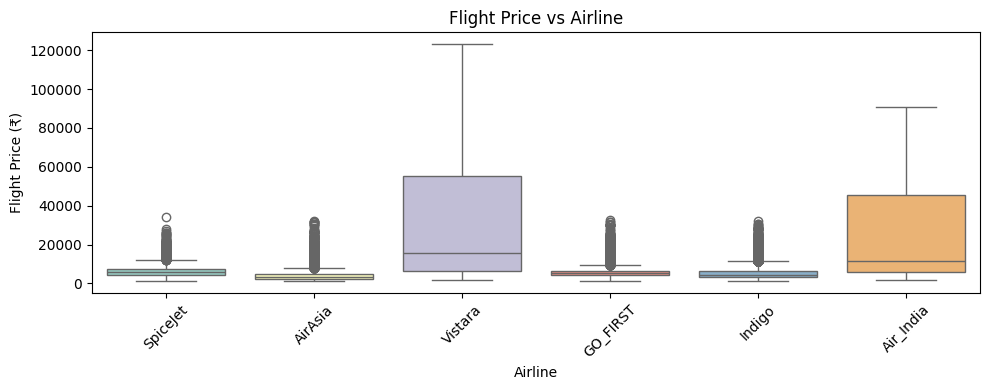

/tmp/ipython-input-9-2987113317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set3')


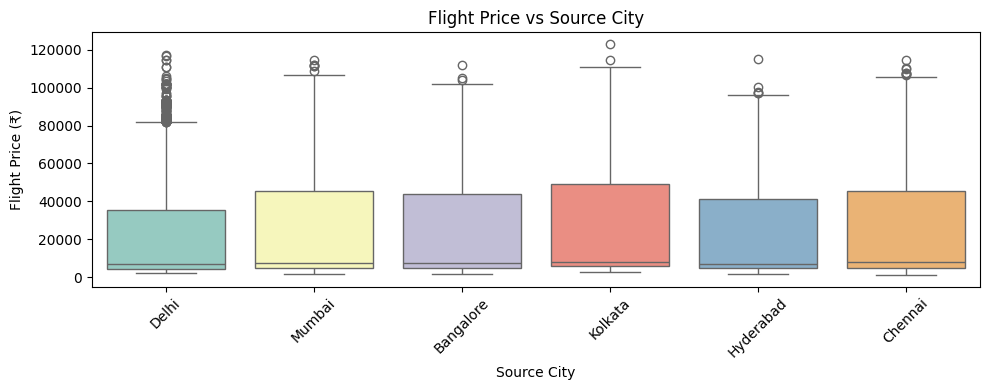

/tmp/ipython-input-9-2987113317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set3')


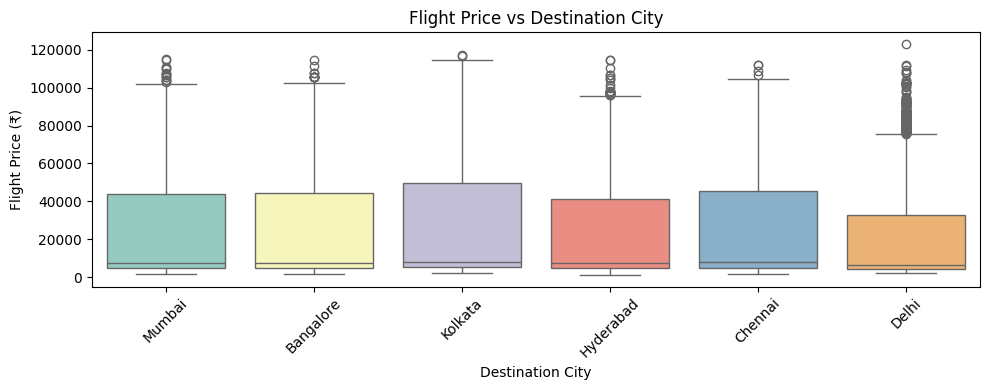

/tmp/ipython-input-9-2987113317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set3')


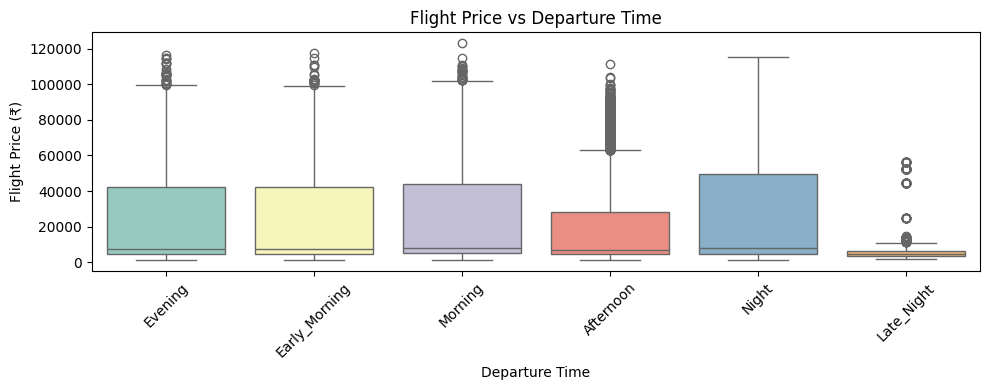

/tmp/ipython-input-9-2987113317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set3')


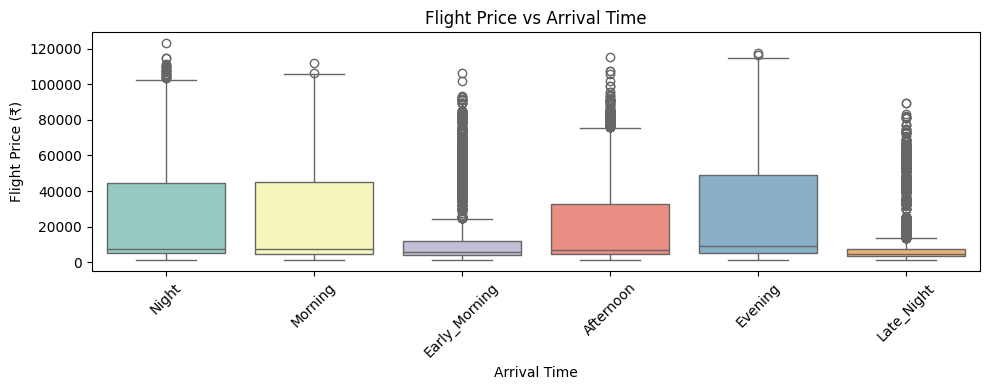

/tmp/ipython-input-9-2987113317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set3')


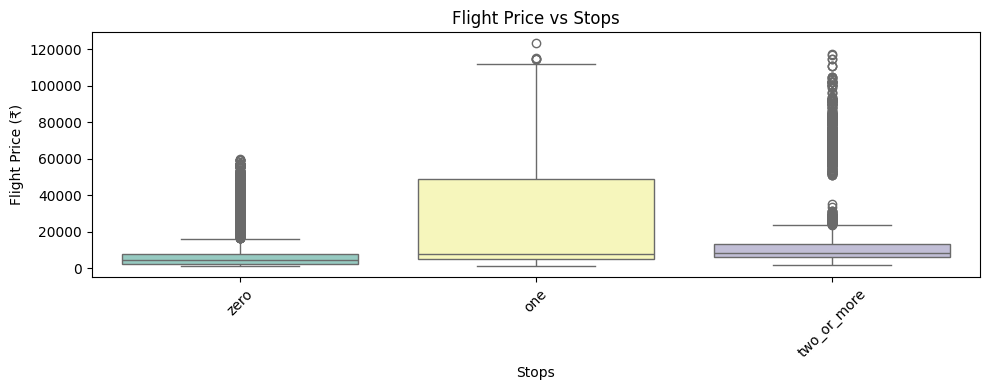

/tmp/ipython-input-9-2987113317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set3')


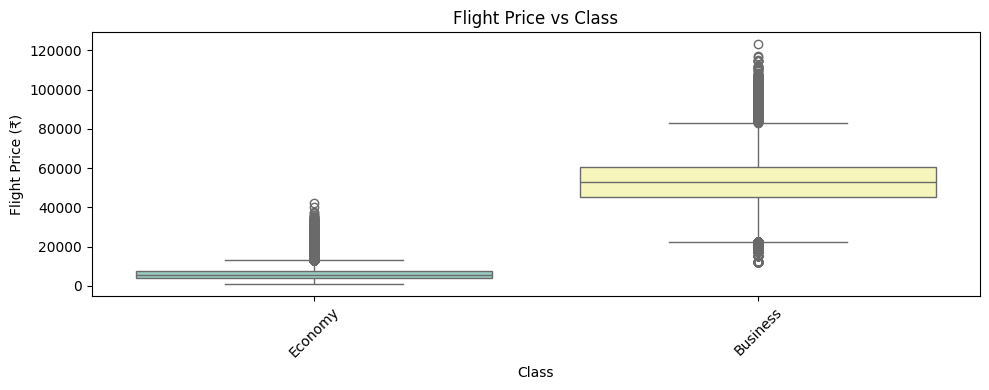

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct categorical columns
categorical_cols = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']

# Plot boxplots of price vs each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], y=df['price'], palette='Set3')
    plt.title(f"Flight Price vs {col.replace('_', ' ').title()}")
    plt.xticks(rotation=45)
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Flight Price (₹)")
    plt.tight_layout()
    plt.show()


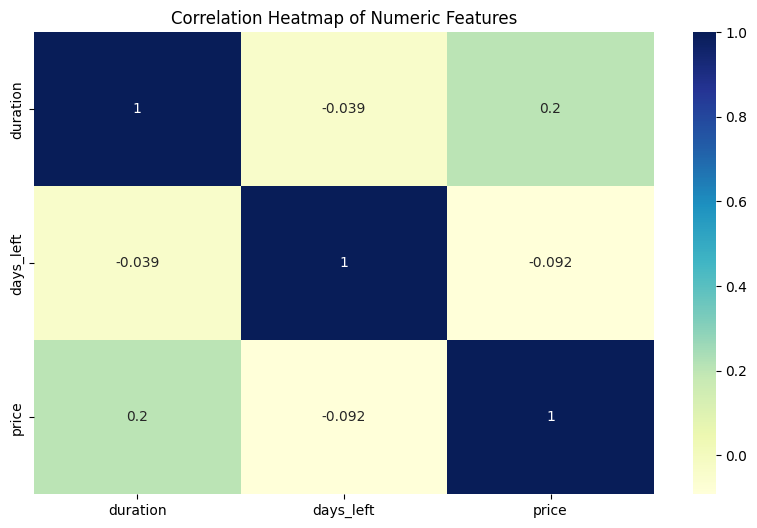

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


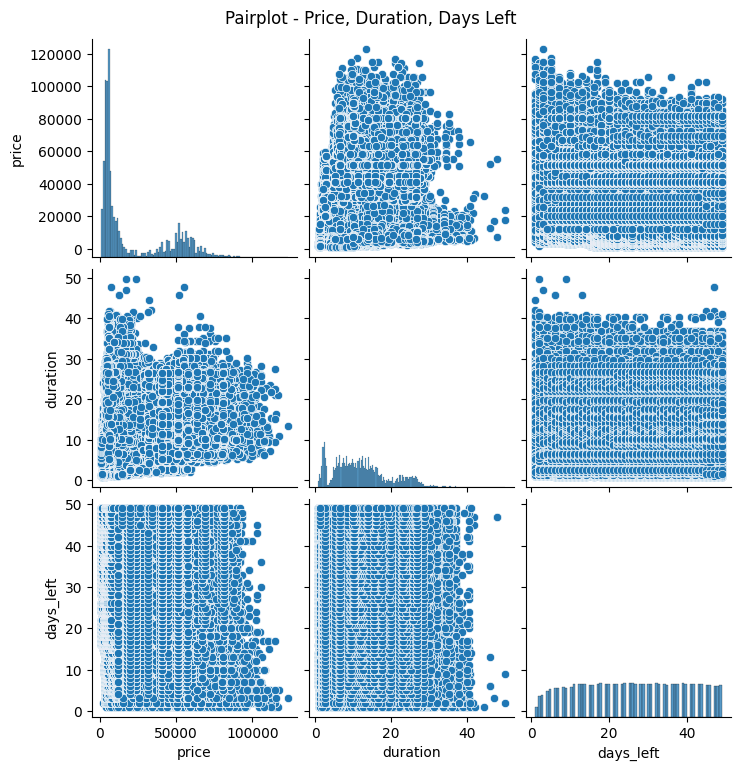

In [11]:
sns.pairplot(df[['price', 'duration', 'days_left']], kind='scatter')
plt.suptitle("Pairplot - Price, Duration, Days Left", y=1.02)
plt.show()


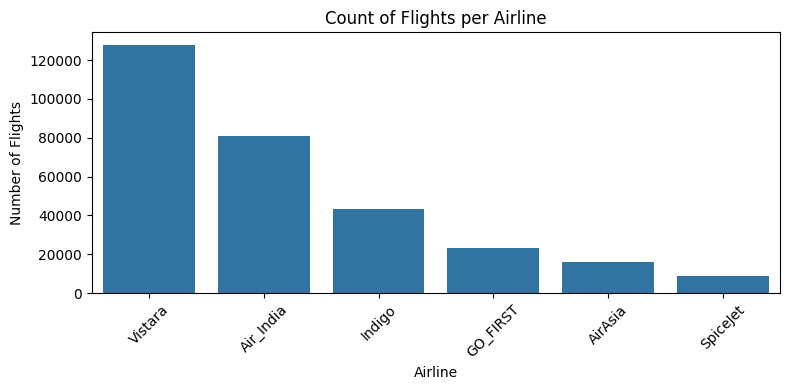

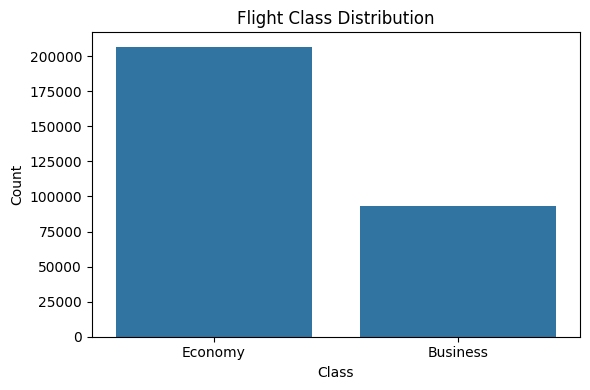

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of flights per airline
plt.figure(figsize=(8, 4))
sns.countplot(x='airline', data=df, order=df['airline'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Flights per Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title("Flight Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-900958521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stops', y='price', data=df, palette='coolwarm')


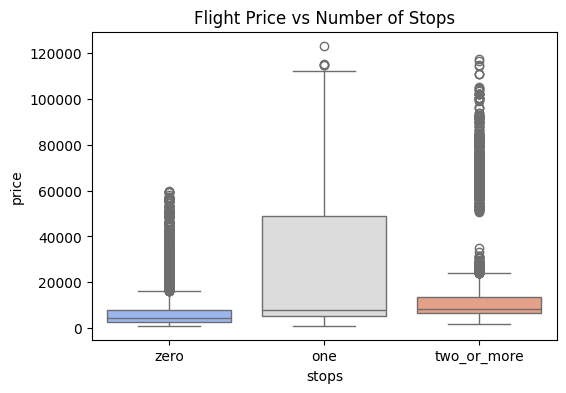

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='stops', y='price', data=df, palette='coolwarm')
plt.title("Flight Price vs Number of Stops")
plt.show()


In [14]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [15]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 240122
Testing samples: 60031


In [17]:
scaler = StandardScaler()
num_cols = ['duration', 'days_left']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [18]:
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [19]:
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"R² Score: {round(r2, 4)}")
    print(f"MAE: ₹{round(mae, 2)}")
    print(f"MSE: {round(mse, 2)}")
    print(f"RMSE: ₹{round(rmse, 2)}")

evaluate_model(y_test, y_pred)


R² Score: 0.9751
MAE: ₹2042.42
MSE: 12833031.69
RMSE: ₹3582.32


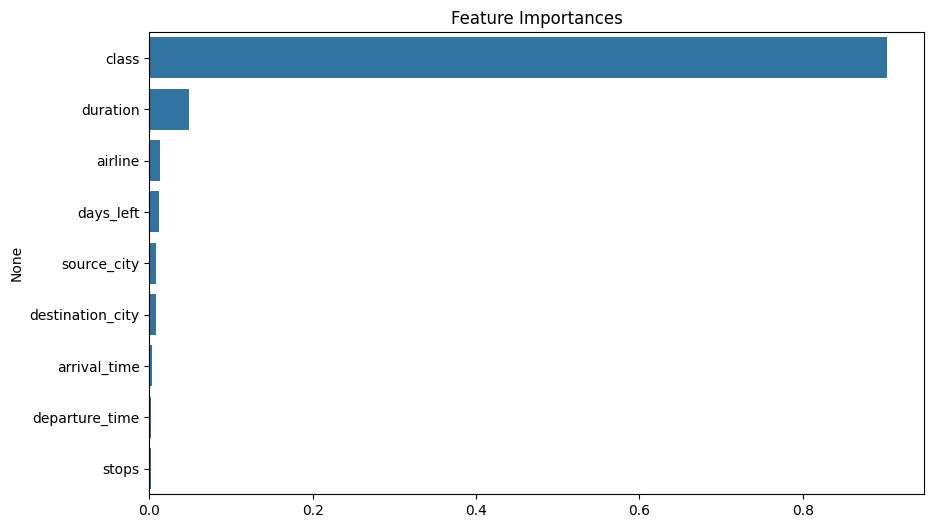

In [20]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.show()


In [21]:
import gradio as gr
import numpy as np
import pandas as pd

# Feature columns for the model (in the same order!)
feature_cols = ['airline', 'source_city', 'departure_time', 'stops',
                'arrival_time', 'destination_city', 'class', 'duration', 'days_left']

def predict_price(airline, source_city, departure_time, stops, arrival_time,
                  destination_city, travel_class, duration, days_left):

    # Create input dictionary
    input_data = {
        'airline': [label_encoders['airline'].transform([airline])[0]],
        'source_city': [label_encoders['source_city'].transform([source_city])[0]],
        'departure_time': [label_encoders['departure_time'].transform([departure_time])[0]],
        'stops': [label_encoders['stops'].transform([stops])[0]],
        'arrival_time': [label_encoders['arrival_time'].transform([arrival_time])[0]],
        'destination_city': [label_encoders['destination_city'].transform([destination_city])[0]],
        'class': [label_encoders['class'].transform([travel_class])[0]],
        'duration': [duration],
        'days_left': [days_left]
    }

    # Convert to DataFrame
    input_df = pd.DataFrame(input_data)

    # Standardize numeric columns
    input_df[['duration', 'days_left']] = scaler.transform(input_df[['duration', 'days_left']])

    # Predict
    prediction = model.predict(input_df)[0]
    return f"✈️ Estimated Flight Price: ₹{int(prediction):,}"

# Gradio Interface
demo = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(label_encoders['airline'].classes_.tolist(), label="Airline"),
        gr.Dropdown(label_encoders['source_city'].classes_.tolist(), label="Source City"),
        gr.Dropdown(label_encoders['departure_time'].classes_.tolist(), label="Departure Time"),
        gr.Dropdown(label_encoders['stops'].classes_.tolist(), label="Stops"),
        gr.Dropdown(label_encoders['arrival_time'].classes_.tolist(), label="Arrival Time"),
        gr.Dropdown(label_encoders['destination_city'].classes_.tolist(), label="Destination City"),
        gr.Dropdown(label_encoders['class'].classes_.tolist(), label="Travel Class"),
        gr.Slider(30, 3000, step=1, label="Duration (in minutes)"),
        gr.Slider(1, 60, step=1, label="Days Left to Departure"),
    ],
    outputs="text",
    title="✈️ Flight Price Prediction App",
    description="Enter flight details and get the predicted price instantly."
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b52fd98b12761d1655.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
